In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 13,6
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Задача 1

Ответить на вопрос:

Есть ли связь между жёсткостью воды и средней годовой смертностью?

1) Построить точечный график

2) Рассчитать коэффициенты корреляции Пирсона и Спирмена

3) Построить модель линейной регрессии

4) Рассчитать коэффициент детерминации

5) Вывести график остатков

In [3]:
df = pd.read_csv('water.csv')
df = df.drop(columns = 'Unnamed: 0')
df

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81


In [5]:
df.describe(include = 'all')

,location,town,mortality,hardness
count,61,61,61.000000,61.000000
unique,2,61,NaN,NaN
top,North,Burnley,NaN,NaN
freq,35,1,NaN,NaN
mean,NaN,NaN,1524.147541,47.180328
std,NaN,NaN,187.668754,38.093966
min,NaN,NaN,1096.000000,5.000000
25%,NaN,NaN,1379.000000,14.000000
50%,NaN,NaN,1555.000000,39.000000
75%,NaN,NaN,1668.000000,75.000000


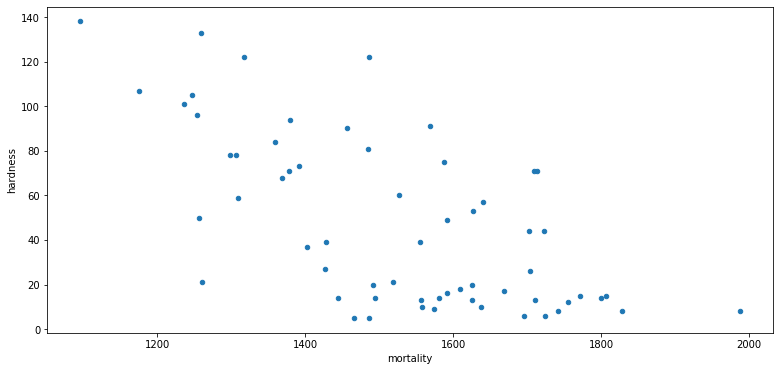

In [14]:
df.plot(kind='scatter', x='mortality', y='hardness')

In [9]:
df[['mortality','hardness']].corr() #Рассчитать коэффициенты корреляции Пирсона и Спирмена

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [10]:
df[['mortality','hardness']].corr('spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [11]:
df[['mortality','hardness']].corr('kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


In [12]:
X = df[['hardness']]
y = df['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.5046490611017092

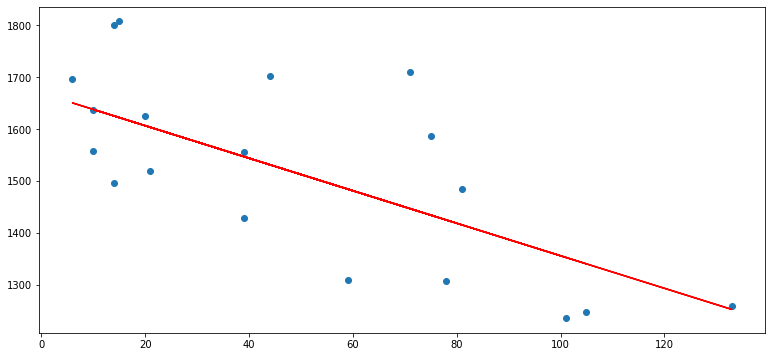

In [13]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

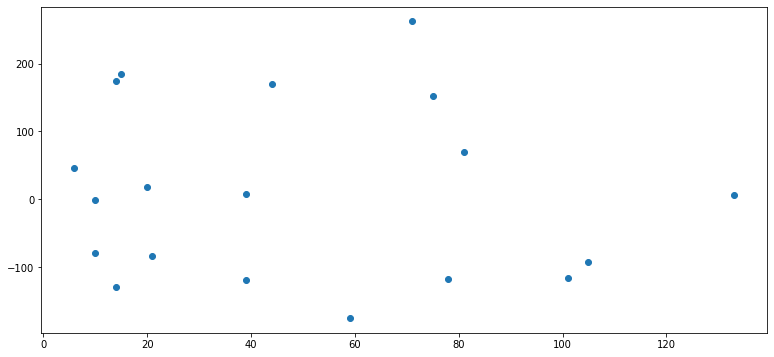

In [15]:
plt.scatter(X_test, y_test - y_pred) # График остатков

ИТОГ:    
Статистическая связь между жесткостью воды и смертностью – есть: она обратно пропорциональная, и коэффициенты корреляции нам это показывают. Однако мы должны помнить, что это может быть не основным и второстепенным фактором влияния на смертность. Необходим комплексный анализ среды.

2 Задание.

Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

1) Разделить данные на 2 группы

2) Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

Группа North

In [16]:
df_n = df.loc[df.location == 'North']
df_n.head()

,location,town,mortality,hardness
1,North,Birkenhead,1668,17
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
5,North,Bolton,1558,10
6,North,Bootle,1807,15


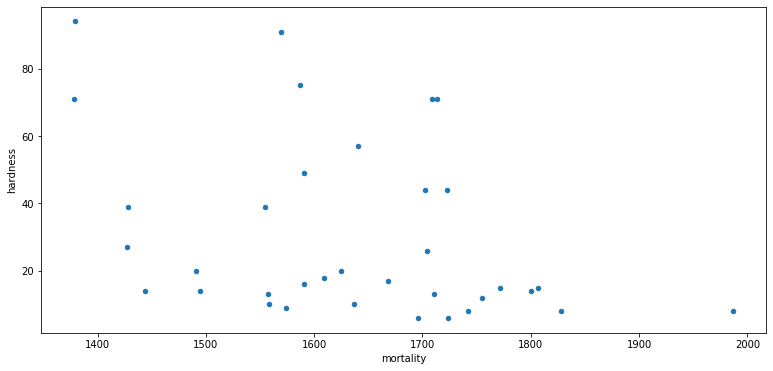

In [17]:

# точечный график

df_n.plot(kind='scatter', x='mortality', y='hardness')

In [18]:

#   Коэффициент корреляции Пирсона:

df_n[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [19]:
#   Коэффициент корреляции Спирмана:

df_n[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


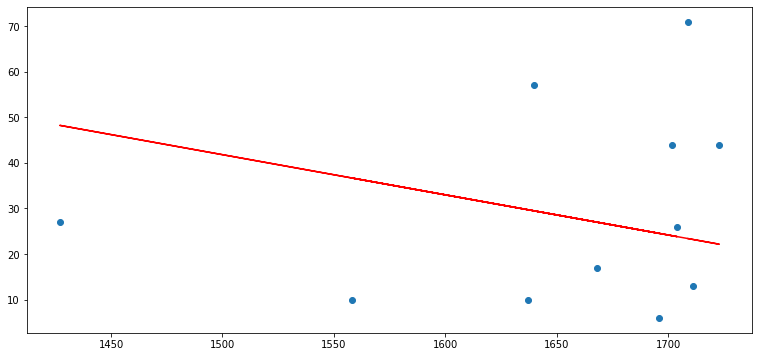

In [23]:
# Модель линейной регрессии:

X_n = df_n[['mortality']]
y_n = df_n['hardness']
Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_n, y_n, test_size=0.30, random_state=5)

Xn_train.shape
yn_train.shape
model_n = LinearRegression()
model_n.fit(Xn_train, yn_train)

yn_pred = model_n.predict(Xn_test)
plt.scatter(Xn_test, yn_test)
plt.plot(Xn_test, yn_pred, c='r')

In [24]:
model_n.score(Xn_test, yn_test)  # коэффициент детерминации.

-0.28907796008019426

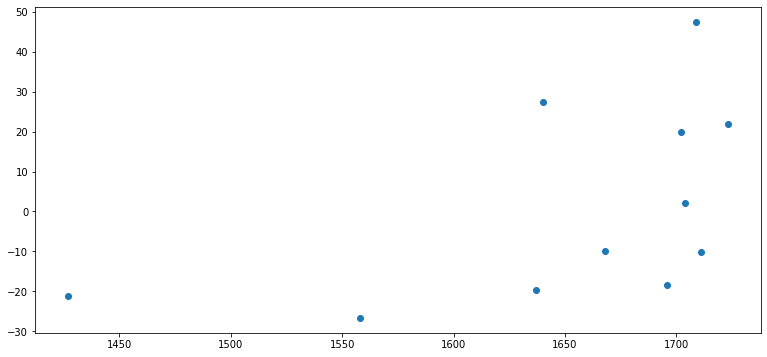

In [25]:
plt.scatter(Xn_test, yn_test - yn_pred) # график остатков

Группа South

In [26]:
df_s = df.loc[df.location == 'South']
df_s.head()

,location,town,mortality,hardness
0,South,Bath,1247,105
2,South,Birmingham,1466,5
7,South,Bournemouth,1299,78
9,South,Brighton,1359,84
10,South,Bristol,1392,73


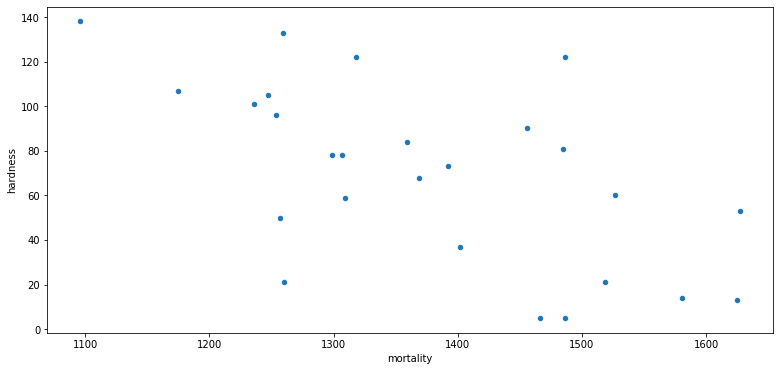

In [27]:
# точечный график

df_s.plot(kind='scatter', x='mortality', y='hardness')

In [28]:
#   Коэффициент корреляции Пирсона:

df_s[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [29]:
#   Коэффициент корреляции Спирмана:

df_s[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


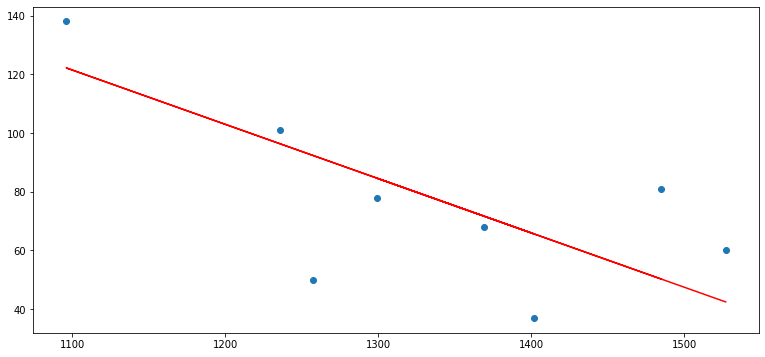

In [30]:
# Модель линейной регрессии:

X_s = df_s[['mortality']]
y_s = df_s['hardness']

Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_s, y_s, test_size=0.30, random_state=5)

model_s = LinearRegression()
model_s.fit(Xs_train, ys_train)

ys_pred = model_s.predict(Xs_test)

plt.scatter(Xs_test, ys_test)
plt.plot(Xs_test, ys_pred, c='r')

In [31]:
model_s.score(Xs_test, ys_test)  # коэффициент детерминации

0.4010334293258293

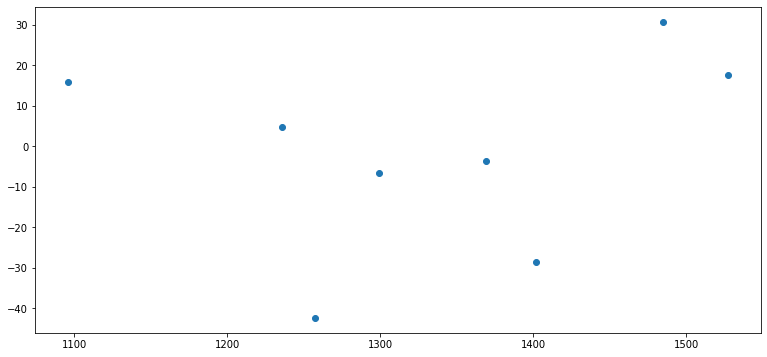

In [32]:
plt.scatter(Xs_test, ys_test - ys_pred) # график остатков

ИТОГ:
У южных городов - зависимость смертности от жесткости воды схожа с зависимостью при анализе общих данных. 
У северных городов - зависимость уменьшаеться, возможно в этих городах в большей степени играют роль другие факторы.

Вполне возможно, это подверждение того, что связи между жесткостью воды и смертностью – нет. Ведь тогда бы тенденция должна была сохраниться, как в отношении детерминации и корреляции.